In [ ]:
#imports
import pickle
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data
def load_batch(folder, batch_name):
    with open(os.path.join(folder, batch_name), 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        return data, labels

In [ ]:
#load all train batches
train_data = []
train_labels = []
folder = 'cifar-10-batches-py'
for i in range(1, 6):
    data, labels = load_batch(folder, f'data_batch_{i}')
    train_data.append(data)
    train_labels += labels

train_data = np.concatenate(train_data)
train_labels = np.array(train_labels)

# Load test batch
test_data, test_labels = load_batch(folder, 'test_batch')
test_labels = np.array(test_labels)

# Normalize data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0


In [ ]:
# Evaluation function
def evaluate_model(name, model, x_test, y_test):
    pred = model.predict(x_test)
    print(f'\n{name} Results:')
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred, average='macro'))
    print("Recall:", recall_score(y_test, pred, average='macro'))
    print("F1 Score:", f1_score(y_test, pred, average='macro'))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


KNN (k=5) Results:
Accuracy: 0.3805
Precision: 0.4449411170615821
Recall: 0.38050000000000006
F1 Score: 0.3758928275190075


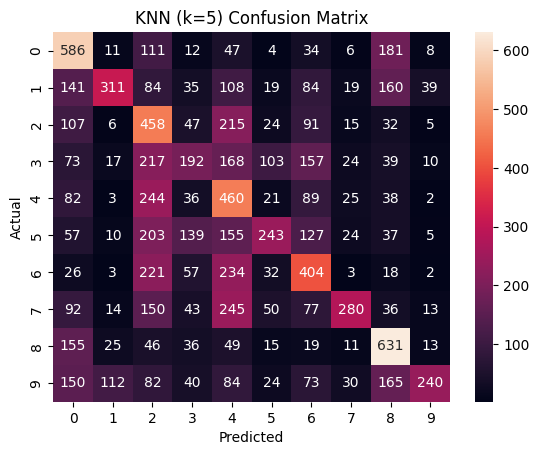


KNN (k=10) Results:
Accuracy: 0.3851
Precision: 0.46099644441936016
Recall: 0.38509999999999994
F1 Score: 0.37880671883595707


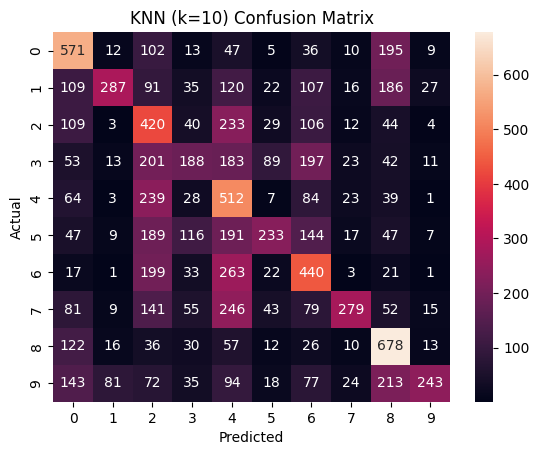


Decision Tree (max_depth=15) Results:
Accuracy: 0.3019
Precision: 0.3041352025291321
Recall: 0.3019
F1 Score: 0.3015128858013125


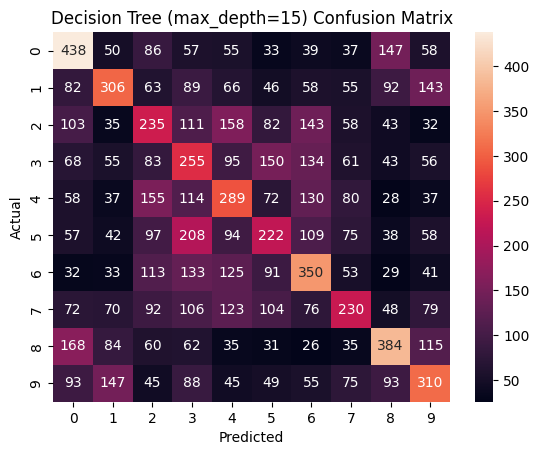


Decision Tree (max_depth=25) Results:
Accuracy: 0.2717
Precision: 0.27198885088657165
Recall: 0.2717
F1 Score: 0.27153974656148744


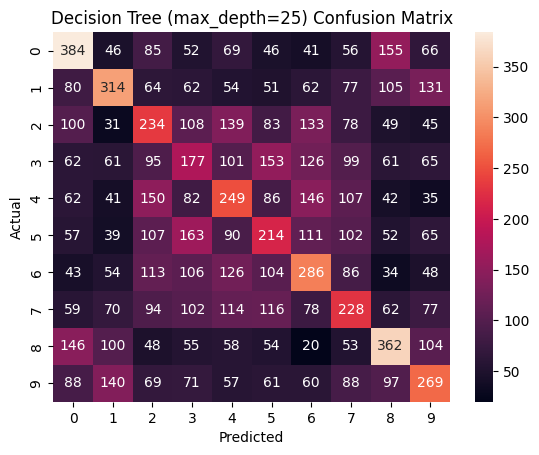


Random Forest (100 trees) Results:
Accuracy: 0.4627
Precision: 0.4594230857305831
Recall: 0.46270000000000006
F1 Score: 0.45947622380818676


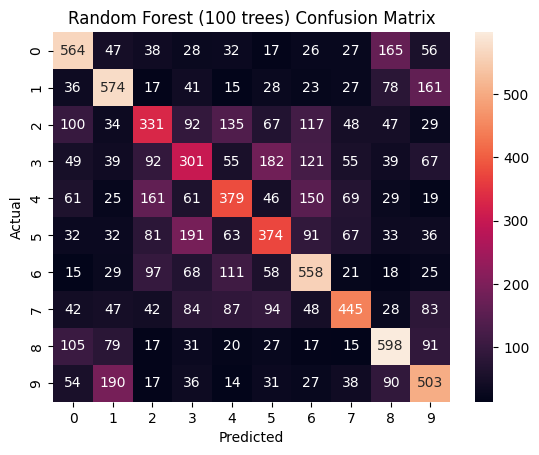


Random Forest (150 trees) Results:
Accuracy: 0.479
Precision: 0.4754611236768242
Recall: 0.479
F1 Score: 0.4750021027278333


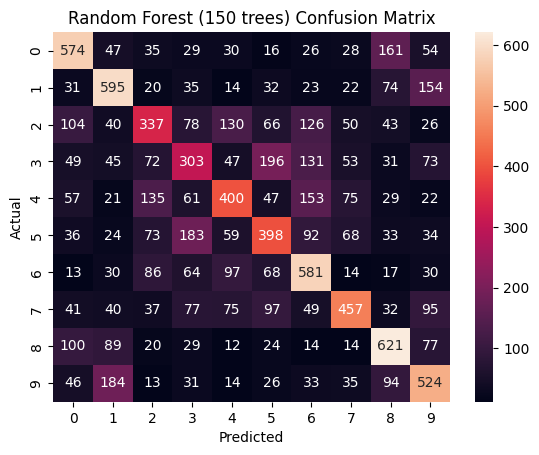


SVM (C=5) Results:
Accuracy: 0.5613
Precision: 0.5608946337917877
Recall: 0.5613
F1 Score: 0.5606041951514891


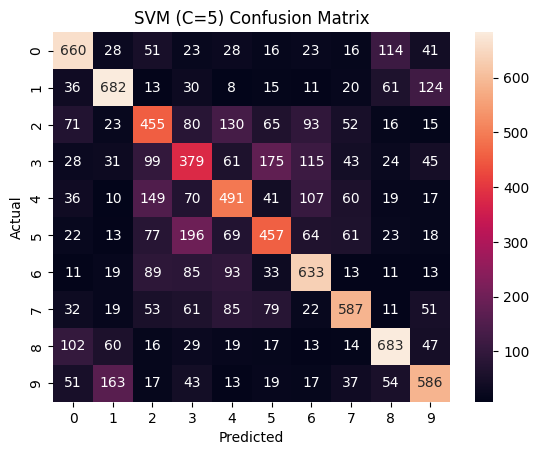


SVM (C=10) Results:
Accuracy: 0.5612
Precision: 0.562318907640642
Recall: 0.5612
F1 Score: 0.5612082964794994


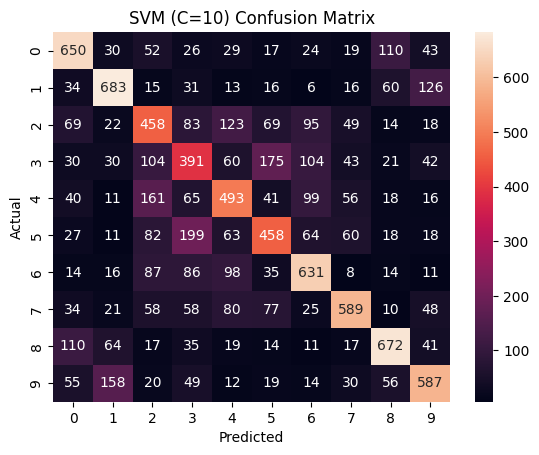


MLP (iter=200) Results:
Accuracy: 0.499
Precision: 0.4995483977768503
Recall: 0.499
F1 Score: 0.49906818399434777


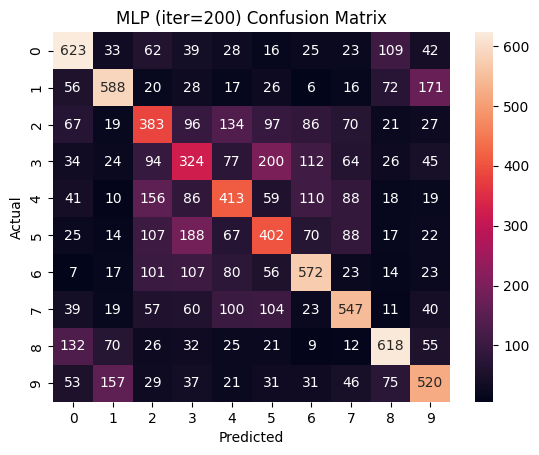


MLP (iter=400) Results:
Accuracy: 0.499
Precision: 0.4995483977768503
Recall: 0.499
F1 Score: 0.49906818399434777


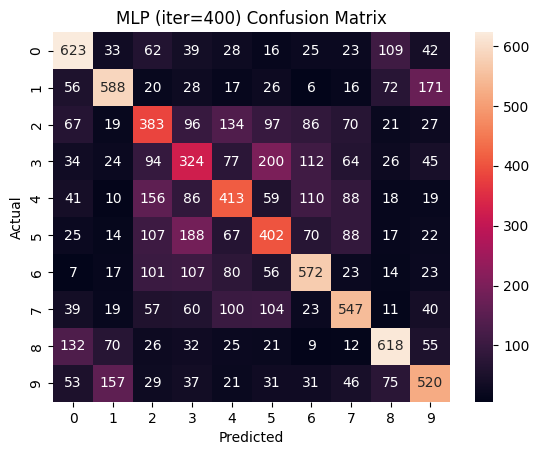

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)
evaluate_model("KNN (k=5)", knn, test_data, test_labels)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_data, train_labels)
evaluate_model("KNN (k=10)", knn, test_data, test_labels)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=15, random_state=1)
dt.fit(train_data, train_labels)
evaluate_model("Decision Tree (max_depth=15)", dt, test_data, test_labels)

dt = DecisionTreeClassifier(max_depth=25, random_state=1)
dt.fit(train_data, train_labels)
evaluate_model("Decision Tree (max_depth=25)", dt, test_data, test_labels)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_data, train_labels)
evaluate_model("Random Forest (100 trees)", rf, test_data, test_labels)

rf = RandomForestClassifier(n_estimators=150, random_state=1)
rf.fit(train_data, train_labels)
evaluate_model("Random Forest (150 trees)", rf, test_data, test_labels)

# SVM
svm = SVC(C=5.0, kernel='rbf')
svm.fit(train_data, train_labels)
evaluate_model("SVM (C=5)", svm, test_data, test_labels)

svm = SVC(C=10.0, kernel='rbf')
svm.fit(train_data, train_labels)
evaluate_model("SVM (C=10)", svm, test_data, test_labels)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=200, random_state=1)
mlp.fit(train_data, train_labels)
evaluate_model("MLP (iter=200)", mlp, test_data, test_labels)

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=400, random_state=1)
mlp.fit(train_data, train_labels)
evaluate_model("MLP (iter=400)", mlp, test_data, test_labels)